In [1]:
# Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import math


file_1 = "co-est2021-pop-13.csv"
file_2 = "co-est2020-alldata.csv"

file_1_df = pd.read_csv(file_1, delimiter=",", skiprows=3)

file_1_df.tail(10)
recent_census =file_1_df.drop(range(160,165))
recent_census


,Unnamed: 0,Unnamed: 1,2020,2021
0,Georgia,"10,711,908","10,725,800","10,799,566"
1,".Appling County, Georgia","18,444","18,428","18,488"
2,".Atkinson County, Georgia","8,286","8,301","8,391"
3,".Bacon County, Georgia","11,140","11,123","11,079"
4,".Baker County, Georgia","2,876","2,844","2,819"
...,...,...,...,...
155,".Whitfield County, Georgia","102,864","102,727","102,848"
156,".Wilcox County, Georgia","8,766","8,731","8,739"
157,".Wilkes County, Georgia","9,565","9,556","9,513"
158,".Wilkinson County, Georgia","8,877","8,844","8,831"


In [2]:
recent_census21 = recent_census['Unnamed: 0'].str.replace('.','')
county21 = recent_census21.str.split(',').str[0]

county21

C:\Users\yhuan\AppData\Local\Temp/ipykernel_24392/1531365318.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  recent_census21 = recent_census['Unnamed: 0'].str.replace('.','')


0               Georgia
1        Appling County
2       Atkinson County
3          Bacon County
4          Baker County
             ...       
155    Whitfield County
156       Wilcox County
157       Wilkes County
158    Wilkinson County
159        Worth County
Name: Unnamed: 0, Length: 160, dtype: object

In [3]:
# 2021 data
data21 = recent_census[['2020','2021']]

census_20 = pd.to_numeric(data21['2020'].str.replace(',',''), errors = 'coerce')

census_20

0      10725800
1         18428
2          8301
3         11123
4          2844
         ...   
155      102727
156        8731
157        9556
158        8844
159       20719
Name: 2020, Length: 160, dtype: int64

In [4]:
census_21 = pd.to_numeric(recent_census['2021'].str.replace(',',''), errors = 'coerce')

census_21

0      10799566
1         18488
2          8391
3         11079
4          2819
         ...   
155      102848
156        8739
157        9513
158        8831
159       20554
Name: 2021, Length: 160, dtype: int64

In [5]:
organized_21 = pd.DataFrame({"County":county21,"2020":census_20, "2021":census_21 })

census21_df= organized_21.set_index("County")

census21_df

,2020,2021
County,,
Georgia,10725800,10799566
Appling County,18428,18488
Atkinson County,8301,8391
Bacon County,11123,11079
Baker County,2844,2819
...,...,...
Whitfield County,102727,102848
Wilcox County,8731,8739
Wilkes County,9556,9513


In [6]:
file_2_df = pd.read_csv(file_2, delimiter=",", encoding="ISO-8859-1")

# file_2_df
file_2_ga = file_2_df[file_2_df['STNAME'] == 'Georgia']
file_2_ga.to_csv('cleanerCounties.csv')
file_2_ga

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019,RNETMIG2020
398,40,3,5,13,0,Georgia,Georgia,9687653,9688737,9712209,...,3.041427,3.798407,1.747055,4.060100,5.814395,7.200931,5.948622,5.638213,6.502924,4.765012
399,50,3,5,13,1,Georgia,Appling County,18236,18237,18337,...,3.098163,-9.988871,-4.843669,2.931914,-4.662637,-0.813824,-1.626457,4.109774,-8.340780,-2.941657
400,50,3,5,13,3,Georgia,Atkinson County,8375,8380,8363,...,-9.329028,-18.178535,-4.116970,-14.082797,7.737879,-11.188643,-7.009063,6.505632,-16.613495,8.402353
401,50,3,5,13,5,Georgia,Bacon County,11096,11097,11062,...,7.833603,-5.021971,0.089582,0.715820,1.071285,2.400747,-9.077964,-10.313901,-2.342976,-7.590133
402,50,3,5,13,7,Georgia,Baker County,3451,3447,3431,...,-38.267576,11.974255,-8.933889,-18.694407,-27.782065,-1.881763,-3.468390,-25.932448,-16.297262,-24.592888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,50,3,5,13,313,Georgia,Whitfield County,102599,102602,102740,...,-5.533701,-5.965944,-7.713370,-1.963739,-0.193555,1.134970,-7.072937,-4.851221,-1.439719,-7.111897
554,50,3,5,13,315,Georgia,Wilcox County,9255,9251,9313,...,-6.572922,-18.889556,1.324284,-14.569315,12.371823,-17.704073,-7.380493,4.213163,-21.390374,-8.299725
555,50,3,5,13,317,Georgia,Wilkes County,10593,10593,10389,...,-13.676706,-12.202923,-10.187775,4.424111,0.301705,-7.600709,9.859728,3.449500,-4.588559,-0.822073
556,50,3,5,13,319,Georgia,Wilkinson County,9563,9569,9528,...,-14.360382,7.303906,-11.569897,-8.581849,-19.495725,-3.425225,-5.674864,10.246130,-7.914832,-9.240478


In [9]:
ga_census_estimate_population = file_2_ga[["CTYNAME","POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2013", "POPESTIMATE2014", "POPESTIMATE2015", "POPESTIMATE2016", "POPESTIMATE2017", "POPESTIMATE2018","POPESTIMATE2019"]]
ga_census_estimate_population = ga_census_estimate_population.rename(columns={"CTYNAME":"County","POPESTIMATE2010": "2010", "POPESTIMATE2011": "2011", "POPESTIMATE2012": "2012", "POPESTIMATE2013": "2013", "POPESTIMATE2014": "2014", "POPESTIMATE2015": "2015", "POPESTIMATE2016": "2016", "POPESTIMATE2017": "2017", "POPESTIMATE2018": "2018", "POPESTIMATE2019": "2019"})
ga_census_20 = ga_census_estimate_population.set_index("County")
ga_census_20

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
County,,,,,,,,,,
Georgia,9712209,9803630,9903580,9975592,10071204,10183353,10308442,10417031,10519389,10628020
Appling County,18337,18459,18382,18367,18469,18420,18443,18447,18538,18389
Atkinson County,8363,8359,8254,8263,8211,8331,8293,8257,8344,8269
Bacon County,11062,11150,11152,11174,11178,11225,11268,11204,11096,11098
Baker County,3431,3311,3370,3346,3287,3192,3185,3158,3089,3047
...,...,...,...,...,...,...,...,...,...,...
Whitfield County,102740,102909,102926,102691,103039,103621,104314,104086,104109,104265
Wilcox County,9313,9248,9069,9054,8929,9015,8834,8780,8784,8607
Wilkes County,10389,10230,10093,9931,9960,9927,9808,9868,9845,9769


In [20]:
# merge_census = ga_census_20.merge(census21_df,how ='left', on ='CTYNAME')

merge_census_raw = census21_df.merge(ga_census_20,how ='right', on ='County')


column_names = ["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]

merge_census = merge_census_raw.reindex(columns=column_names)

merge_census

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,,
Georgia,9712209,9803630,9903580,9975592,10071204,10183353,10308442,10417031,10519389,10628020,10725800,10799566
Appling County,18337,18459,18382,18367,18469,18420,18443,18447,18538,18389,18428,18488
Atkinson County,8363,8359,8254,8263,8211,8331,8293,8257,8344,8269,8301,8391
Bacon County,11062,11150,11152,11174,11178,11225,11268,11204,11096,11098,11123,11079
Baker County,3431,3311,3370,3346,3287,3192,3185,3158,3089,3047,2844,2819
...,...,...,...,...,...,...,...,...,...,...,...,...
Whitfield County,102740,102909,102926,102691,103039,103621,104314,104086,104109,104265,102727,102848
Wilcox County,9313,9248,9069,9054,8929,9015,8834,8780,8784,8607,8731,8739
Wilkes County,10389,10230,10093,9931,9960,9927,9808,9868,9845,9769,9556,9513


In [22]:
year_merge = merge_census.keys()

year_merge

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021'],
      dtype='object')

In [54]:
# pick x numbers randomly
randomNumbers_merge = []
i = 0
while i < 10:
    
    num_merge = random.randint(1, 159)
    if num2 not in randomNumbers_merge:
        randomNumbers_merge.append(num_merge)
#         print(randomNumbers2)
        i = i + 1

2010    127939
2011    129390
2012    130614
2013    132980
2014    135191
2015    138217
2016    140561
2017    143218
2018    146063
2019    148504
2020    146653
2021    149956
Name: Coweta County, dtype: int64
2010    8983
2011    8836
2012    8560
2013    8522
2014    8399
2015    8353
2016    8263
2017    8268
2018    8179
2019    8164
2020    7986
2021    7856
Name: Twiggs County, dtype: int64
2010    2512
2011    2454
2012    2407
2013    2368
2014    2287
2015    2277
2016    2323
2017    2334
2018    2254
2019    2300
2020    2224
2021    2243
Name: Quitman County, dtype: int64
2010    62772
2011    65210
2012    64482
2013    62438
2014    64217
2015    61762
2016    61672
2017    61819
2018    60887
2019    62813
2020    65220
2021    65711
Name: Liberty County, dtype: int64
2010    12577
2011    12576
2012    12567
2013    12474
2014    12395
2015    12351
2016    12250
2017    12236
2018    12273
2019    12345
2020    12100
2021    12153
Name: Crawford County, dtype: int6

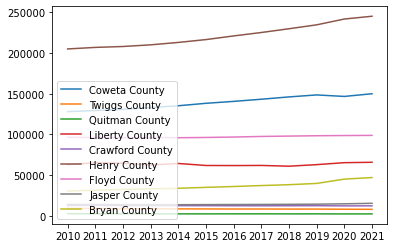

In [35]:
countyDataDictionary_merge = {}
county_names= []

for x in randomNumbers_merge:

    countyDataDictionary_merge[x] = merge_census.iloc[x]        

for x in countyDataDictionary_merge:
    print(countyDataDictionary_merge[x])
    
    county_names.append(countyDataDictionary_merge[x].name)
    plt.plot(year_merge, countyDataDictionary_merge[x])
    
# for col in df:
#     plt.plot(df.index, df[col])
# plt.legend(df.columns)
# plt.show()

county_df = pd.DataFrame({"data":countyDataDictionary_merge})

# print(county_df)

plt.legend(county_names,loc="lower left")
# plt.yscale('log')
plt.show()

In [45]:
merge_census

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,,
Georgia,9712209,9803630,9903580,9975592,10071204,10183353,10308442,10417031,10519389,10628020,10725800,10799566
Appling County,18337,18459,18382,18367,18469,18420,18443,18447,18538,18389,18428,18488
Atkinson County,8363,8359,8254,8263,8211,8331,8293,8257,8344,8269,8301,8391
Bacon County,11062,11150,11152,11174,11178,11225,11268,11204,11096,11098,11123,11079
Baker County,3431,3311,3370,3346,3287,3192,3185,3158,3089,3047,2844,2819
...,...,...,...,...,...,...,...,...,...,...,...,...
Whitfield County,102740,102909,102926,102691,103039,103621,104314,104086,104109,104265,102727,102848
Wilcox County,9313,9248,9069,9054,8929,9015,8834,8780,8784,8607,8731,8739
Wilkes County,10389,10230,10093,9931,9960,9927,9808,9868,9845,9769,9556,9513


Stewart County
Bartow County
Rabun County
Glascock County
Forsyth County
Pike County
Tift County
Upson County
Coweta County
Chattooga County


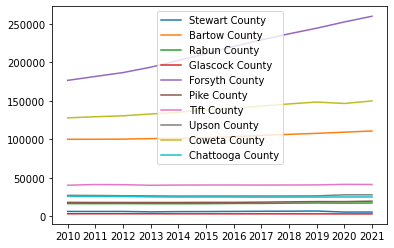

In [60]:
samples_df = merge_census.sample(10)

for row in samples_df.index:
    print(row)
    
    plt.plot(samples_df.loc[row,:])

plt.legend(samples_df.index)
plt.show()

In [61]:
samples_df.T

County,Stewart County,Bartow County,Rabun County,Glascock County,Forsyth County,Pike County,Tift County,Upson County,Coweta County,Chattooga County
2010,6099,100041,16276,3079,176736,17929,40250,27052,127939,25958
2011,6065,100110,16257,3103,181828,17792,41160,26919,129390,25689
2012,6106,100241,16303,3107,186848,17780,40947,26561,130614,25635
2013,5555,100923,16184,3060,193875,17784,40180,26425,132980,25062
2014,5882,101251,16159,3008,202697,17774,40456,26166,135191,24871
2015,5969,102063,16224,3020,211368,17935,40538,26237,138217,24918
2016,6129,103418,16493,2976,220856,17916,40562,26243,140561,24847
2017,6329,105190,16560,3031,229367,18213,40455,26223,143218,24757
2018,6434,106488,16853,2968,237330,18622,40562,26249,146063,24836
2019,6649,107757,17116,2959,244624,18953,40653,26402,148504,24846


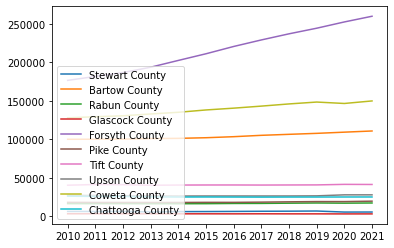

In [62]:
plt.plot(samples_df.T);
plt.legend(samples_df.index,loc="lower left")
plt.show()

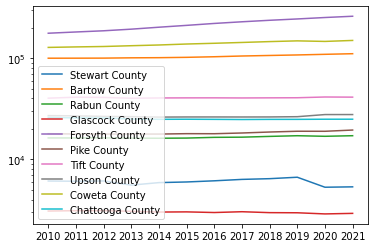

In [63]:
plt.plot(samples_df.T);
plt.legend(samples_df.index,loc="lower left")
plt.yscale('log')
plt.show()